#FURNITURE SALES PREDICTION USING STATSMODELS LIB "SARIMAX MODEL"

INSTALL REQUIRED LIBRARIES AND IMPORT

In [33]:
#pip install xlrd,statsmodels,matplotlib,pandas,numpy
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

READ DATASET AS df
&  SEPRATE FURNITURE CATEGORY OF DATA AS furniture

In [34]:
df = pd.read_excel("/Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']    #extract rows with "furniture " category

CHECK ROWS AND COLUMNS OF total dataset(df) & furnitureCategory(furniture)

In [35]:
print("Dataset shape",df.shape)
print("Furniture data shape", furniture.shape)

Dataset shape (9994, 21)
Furniture data shape (2121, 21)


In [36]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


CHECK FIRST FURNITURE SALE 'ORDER DATE'

In [37]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

CHECK LAST FURNITURE SALE 'ORDER DATE'

In [38]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

###PRE-PROCESSING

REMOVE COLUMNS(FEATURES) FROM DATSET THAT ARE NOT REQUIRED

In [12]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)           #axis=1 for column
furniture = furniture.sort_values('Order Date')

FURNITURE DATASET 'SHAPE' AFTER REMOVING FEATURES

In [39]:
furniture.shape

(2121, 21)

In [40]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


COUNT NO OF NULL VALUES IN FURNITURE FEATURES

In [ ]:
furniture.isnull().sum()      #there is no null value so no transformation required

Order Date    0
Sales         0
dtype: int64

Grouping Sales On Same day Using Order Date & reset index(orderdate)

In [41]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [42]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


Indexing Dataset using OrderDate

In [43]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

Resampling Sales on Monthly Basis (MS) as **y**

In [44]:
y = furniture['Sales'].resample('MS').mean()     #take mean value of all salesprice in a month

After Resampling,Check Sales from 2017 onwards on Monthly Basis

In [45]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

###PLOTTING SALES 2014-2017

PLOT SALES FROM 2014-2017

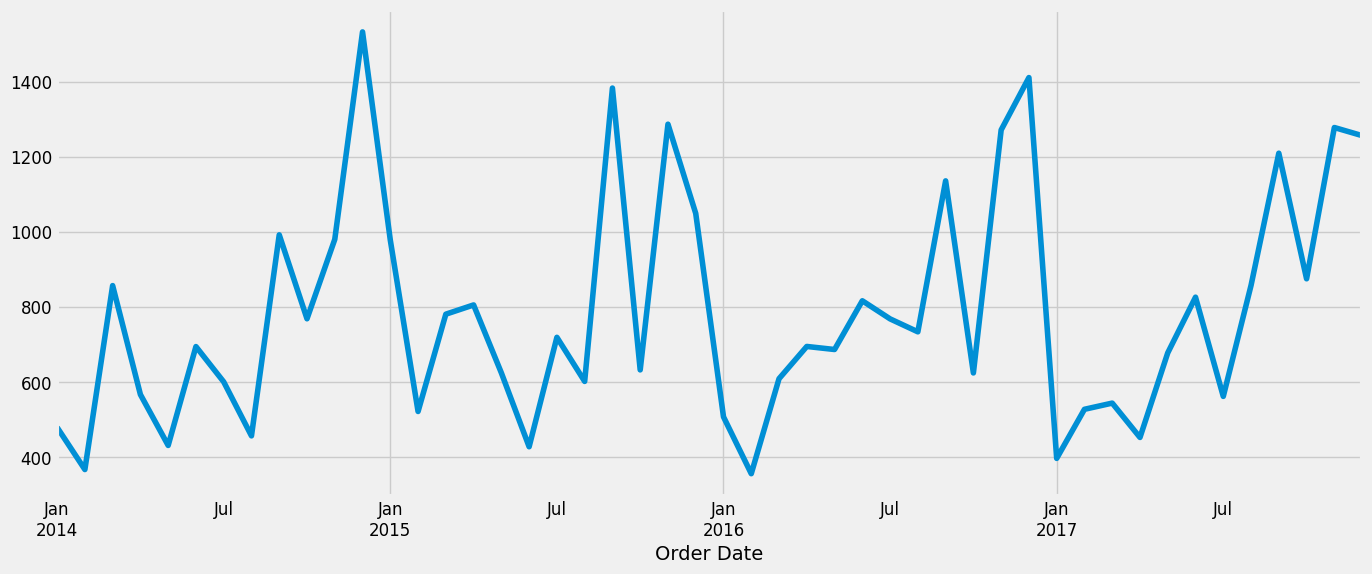

In [46]:
y.plot(figsize=(15, 6))  #figsize is row wise and col wise inches
plt.show()

PLOT DECOMPOSITION OF SALES FROM 2014-2017

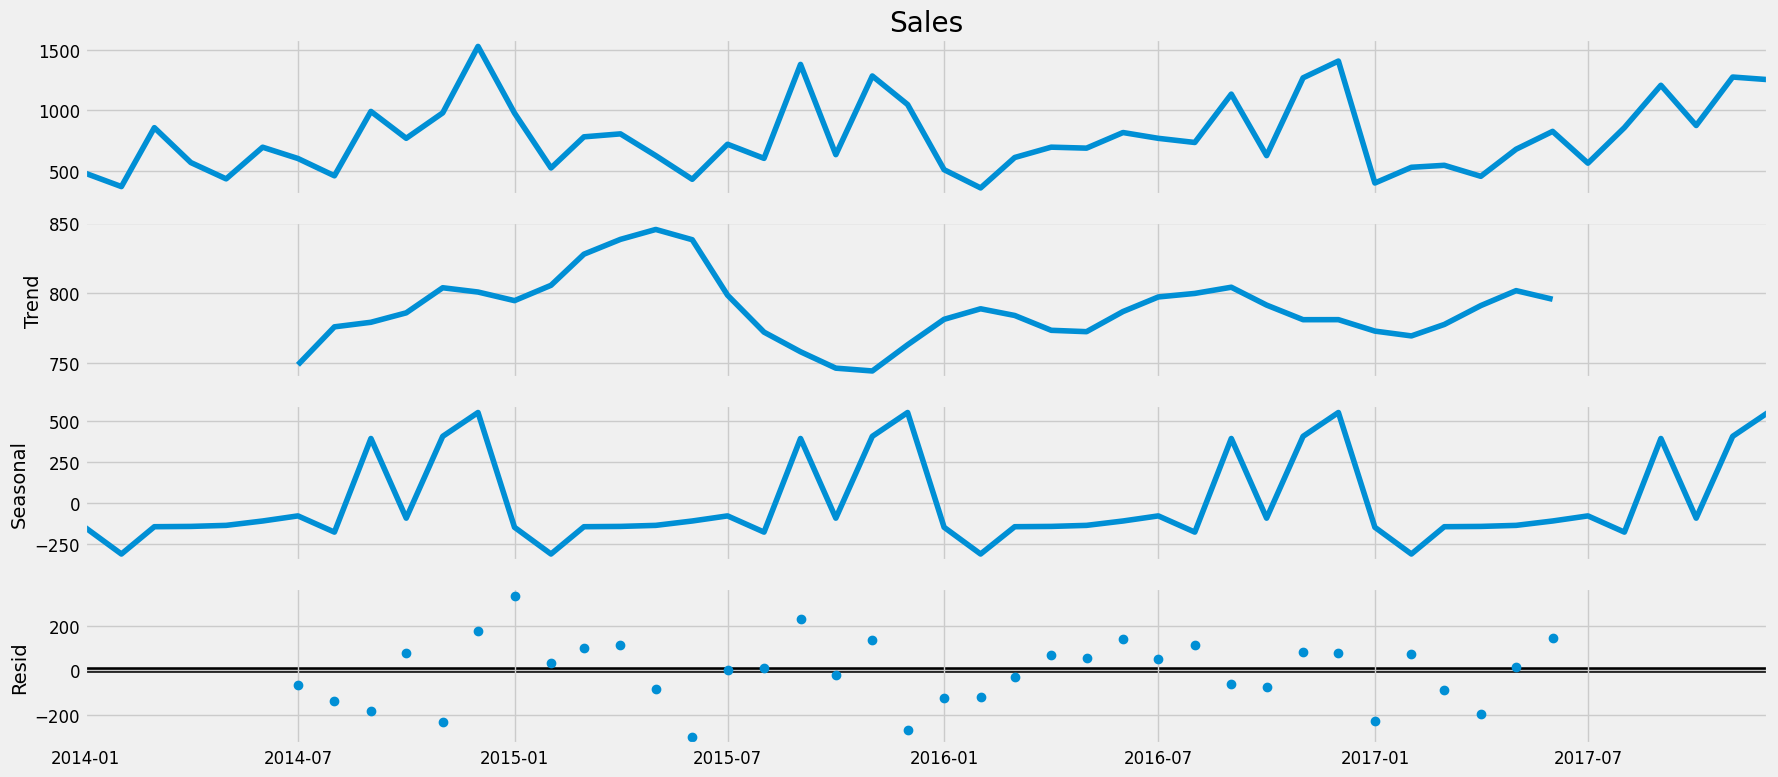

In [47]:
from pylab import rcParams    #rcParams for figsize
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')       #Decomposition could be additive(for constant seasonal pattern at fixed intervals of time) or multiplicative
fig = decomposition.plot()
plt.show()                                                              #fisrt simple sales plot then trend, then  seasonal, then Residual

###SELECTING PARAMETERS FOR MODEL SARIMAX MODEL

Define Parameters

In [48]:
#DEFINING SEASONAL AND NON SEASONAL PDQ
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Select Parameter (with lowest ACI Value) using Grid Search for y input data

In [49]:
#USING GRID SEARCH (EXHAUSTIVE SEARCCH) TO FIND GOOD PARAMETERS VALUE THAT OPTIMIZES RESULTS (lower ACI value)
i=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,               #pass y(furniture dataset) for training
                                            order=param,                  #unseasoned parameter
                                            seasonal_order=param_seasonal,
                                           # enforce_stationarity=False,          #False will not enforce stationarity(on autoregressive(AR/p i.e pastdata) & moving_avg(Q,residual variations) components)
                                            enforce_invertibility=False)          # so offer more flxibility to model

            results = mod.fit()
            if(i==0):
                min=results.aic
                i=1
                print("MINIMUN",min)
            if(min>results.aic):
                 min=results.aic
                 print("MINIMUN",min)            #--------------find minimum aic value
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

        except:
            continue

MINIMUN 784.7193402038779
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:784.7193402038779
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1761.7307355400417
MINIMUN 495.37090274829427
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:495.37090274829427
MINIMUN 489.83053264640563
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:489.83053264640563
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:691.7786646579809
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1887.4131380374656
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:491.25398194270286
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:491.8095630501946
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:751.0635462762989
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2067.1237462124664
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:497.04455587194275
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:491.6640771286905
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:689.6572888695628
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1915.862112055328
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:493.1979865785883
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:493.6293522350258
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - 

In [ ]:
print(min)          #ARIMA(0, 1, 1)x(0, 1, 1, 12)12

482.8319527901093


###Train Model

Use Selected  Parameter value for model & train model using .fit()

In [51]:
#so lowest aci values paraemeters r 0-1-1, 0-1-1-12
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                               # enforce_stationarity=False,                #commentd bcz for plotting on graph stationary data is required
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[0])

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -238.416
Date:                            Sat, 01 Jun 2024   AIC                            482.832
Time:                                    07:25:05   BIC                            487.498
Sample:                                01-01-2014   HQIC                           484.443
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         


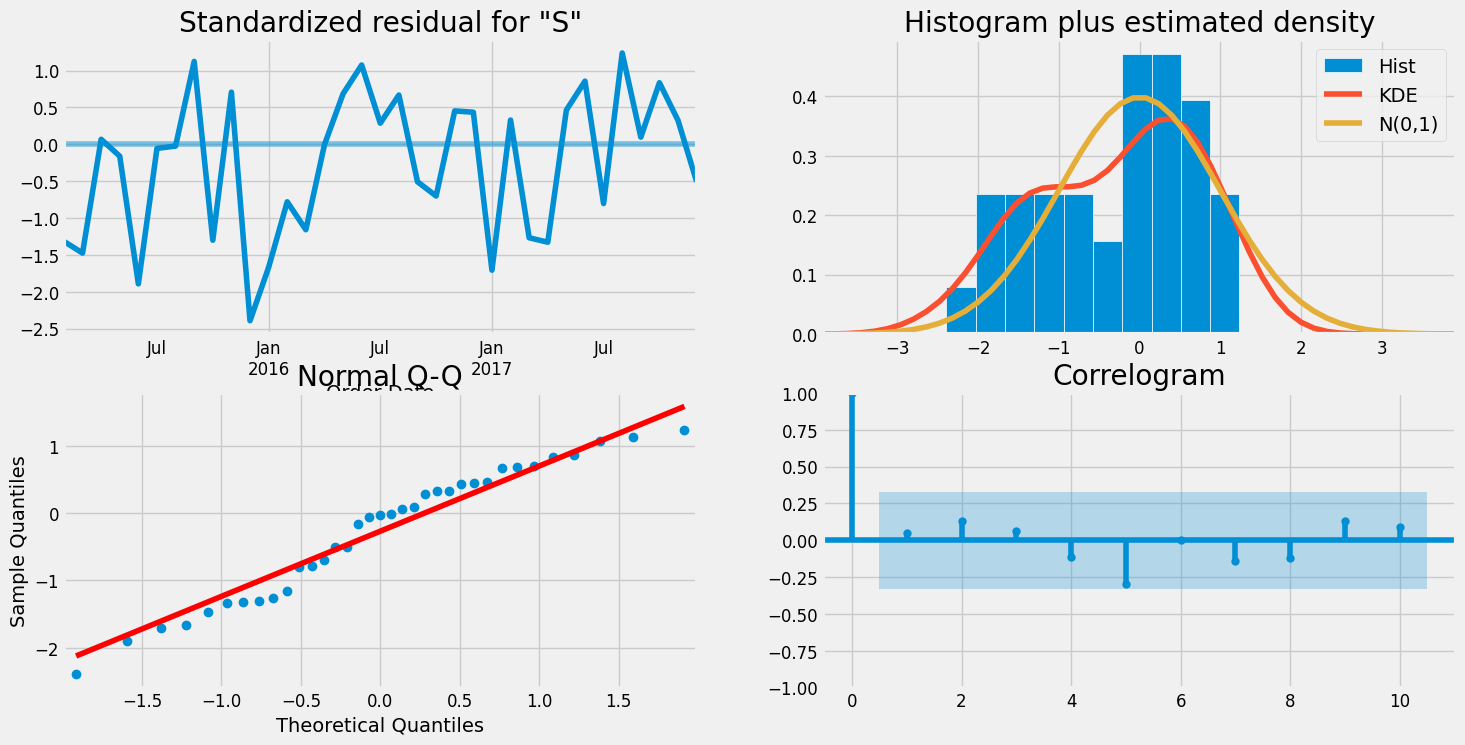

In [ ]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

###Testing : Getting Prediction from 2017 onwards to End of Given Data

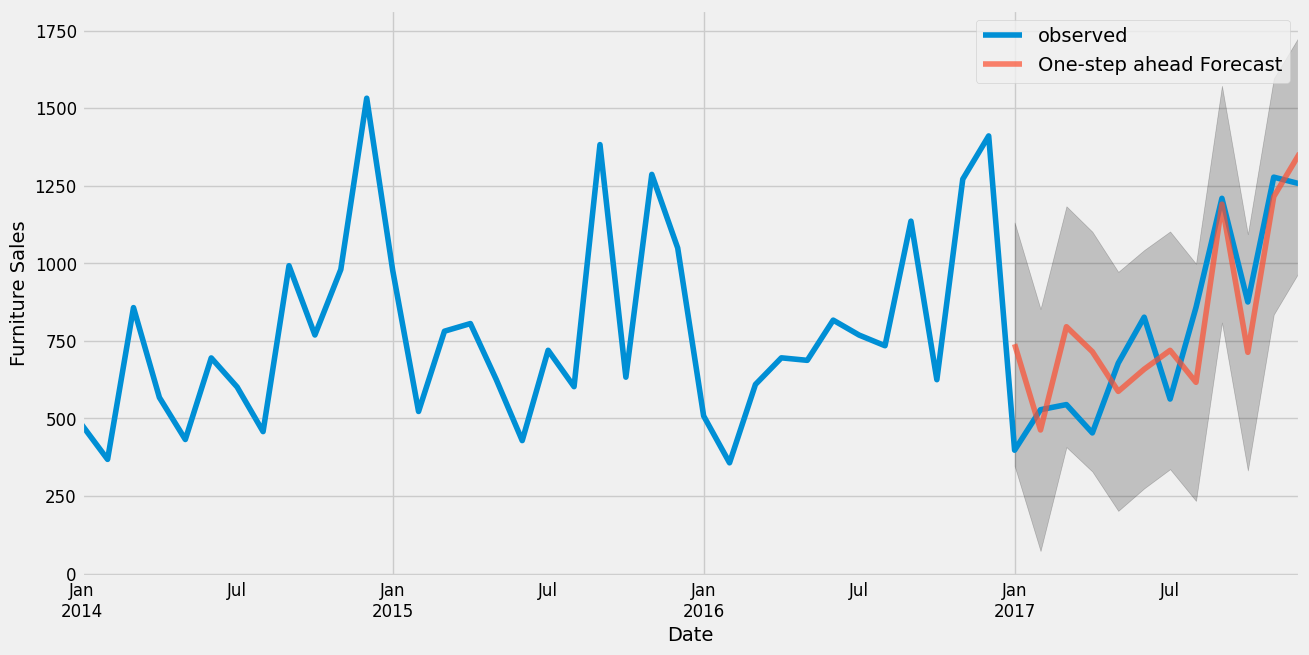

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)      #set forecasts to start at 2017-07-01 to the end of the data. dynamic=false  will not influence prediction bcs of past
pred_ci = pred.conf_int()   #confidence interval

#Plotting to Validate forecast
ax = y['2014':].plot(label='observed')   #Plot Given Data 2014 onward
#alpha for transparecy
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) #plot predicted value on ax plot axis


ax.fill_between(pred_ci.index,           #for confidence intervals
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)    # 'k' for black color

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()


plt.show()

###   Findind ERROR

Mean Squared Error of Prediction

In [54]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 34370.12


Root Mean Squared Error

In [55]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))  #taking sqrt of mean sq error

The Root Mean Squared Error of our forecasts is 185.39


the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 185.39 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

### After TESTING ON 2017 ,Producing Further forecasts

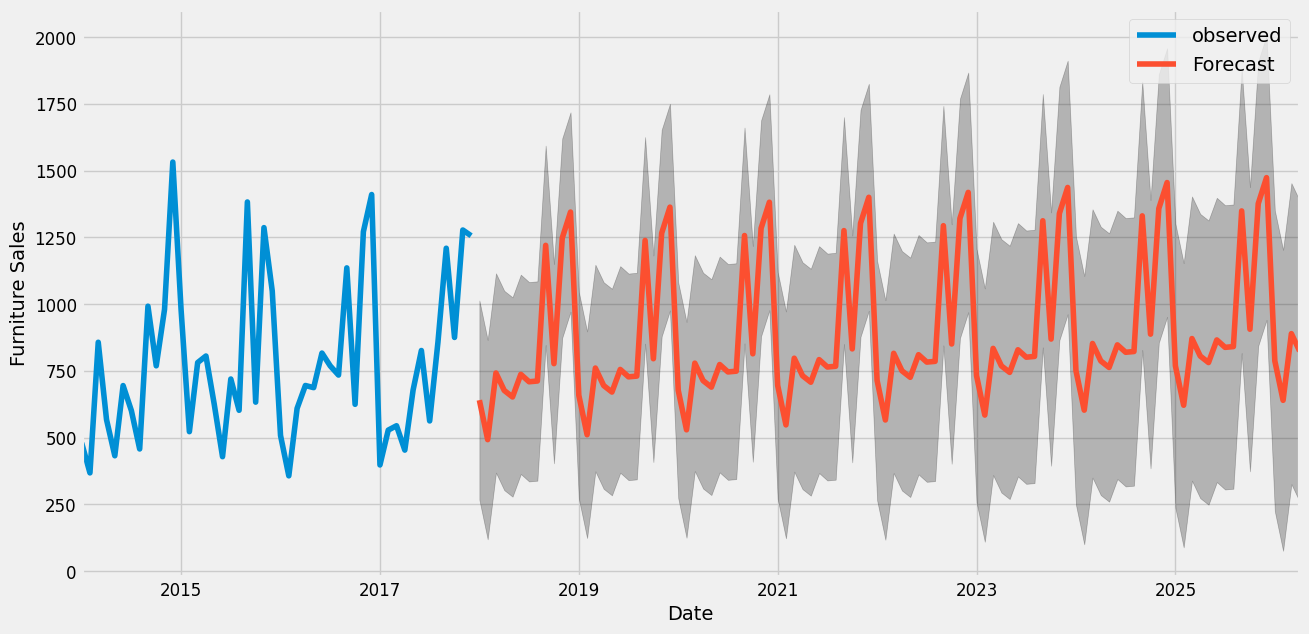

In [56]:
pred_uc = results.get_forecast(steps=100)         #forecast next 100 steps
pred_ci = pred_uc.conf_int()  #confidence interval for future predictions get less specific with time

#PLOTTING Predictions
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()             #show colour tags above
plt.show()

**# FUTURE PREDICTION FOR FURNITURE SALES IS DONE HERE  **

# VISUALIZE FURNITURE+OFFICE SUPPLIES SALES

### Data Pre-Processing

Extract Office Supplies Data

In [57]:
office = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']

Remove Columns Not Required

In [58]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()  #daily base sum of orders
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [59]:
office.shape
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [60]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()       #monthly base sum of orders
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})


PLOT SALES OF FURNITURE & OFFICE SUPPLIES ON ORDER DATE

###MERGE FURNITURE & OFFICE SUPPLIES AS STORE

MERGE office to furniture sales With respect to order date

In [61]:
store = furniture.merge(office, how='inner',on='Order Date')     #store
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True) #sale x = 1 col ,sale y= 2nd col
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


###PLOT SALES

PLOT STORE

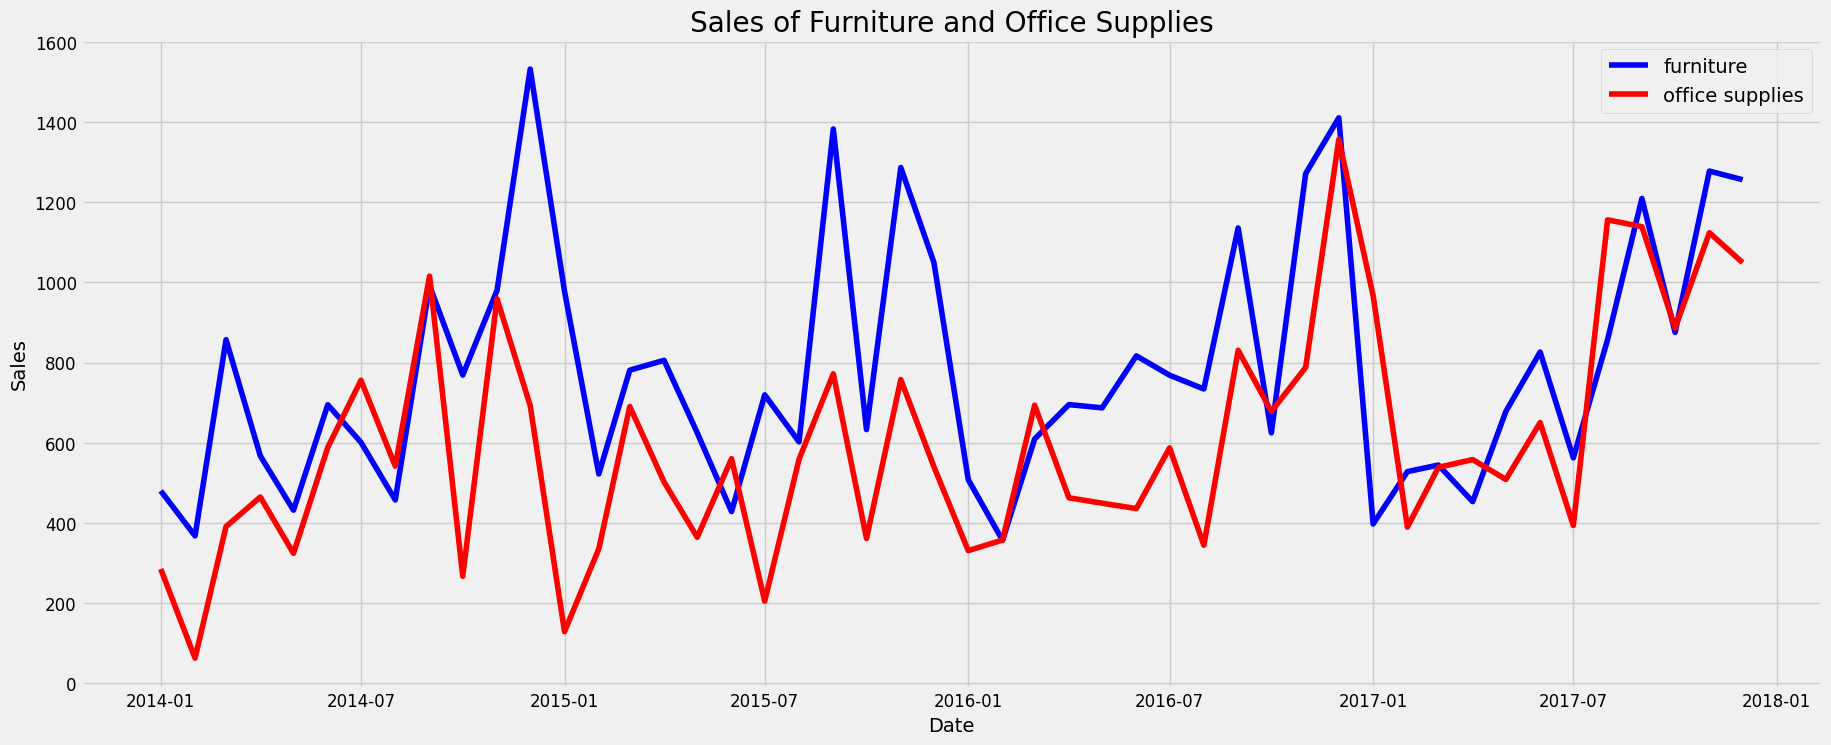

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')                #furniture slaes plot    ,b- for blue colour
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')              #office sales plot
plt.xlabel('Date');
plt.ylabel('Sales');
plt.title('Sales of Furniture and Office Supplies');
plt.legend();

OBSERVATION:
1-sales of furniture and office supplies shared a similar seasonal pattern.---
2- Early of the year is the off season for both of the two categories.---
3- It seems summer time is quiet for office supplies too.---
4-Average daily sales for furniture are higher than those of office supplies in most of the months.---

 **Let's find out when was the first time office supplies' sales surpassed those of furniture's.**

In [62]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
#df.iloc[:, integer]
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))
# 0 IS THE INDEX TO SHOW THE FIRST TIME SALES CROSSED

Office supplies first time produced higher sales than furniture is 2014-07-01.


#TIME SERIES PREDICTON USING PROPHET LIBRARY

Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily.-----------
It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. --------------
Therefore, we are using Prophet to get a model up and running.

In [63]:
#pip intsall prophet
from prophet import Prophet


###TRAINING PROPHET MODEL

Rename Columns For identification in Prophet Lib,Set Prophet Interval and Fit model

In [64]:

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})     #RENAME COLUMNS FOR FURNITURE SALES
furniture_model = Prophet(interval_width=0.95)                               #DEFINE MODEL FOR FURNITURE
furniture_model.fit(furniture)                                               #APPLY DATA TO MODEL FOR TRAINING

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})           #RENAME COLUMNS FOR OFFICE SALES
office_model = Prophet(interval_width=0.95)                                  #RENAME COLUMNS FOR OFFICE SALES
office_model.fit(office)                                                     #RENAME COLUMNS FOR OFFICE SALES

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphzd46wcs/xqryddak.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphzd46wcs/3kz7x9bk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28302', 'data', 'file=/tmp/tmphzd46wcs/xqryddak.json', 'init=/tmp/tmphzd46wcs/3kz7x9bk.json', 'output', 'file=/tmp/tmphzd46wcs/prophet_model_4pz7fih/prophet_model-20240601073129.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:31:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:31:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

###MODEL FORECASTING

In [65]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)


office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

##PLOTTING

##FURNITURE PLOT

<Figure size 1800x600 with 0 Axes>

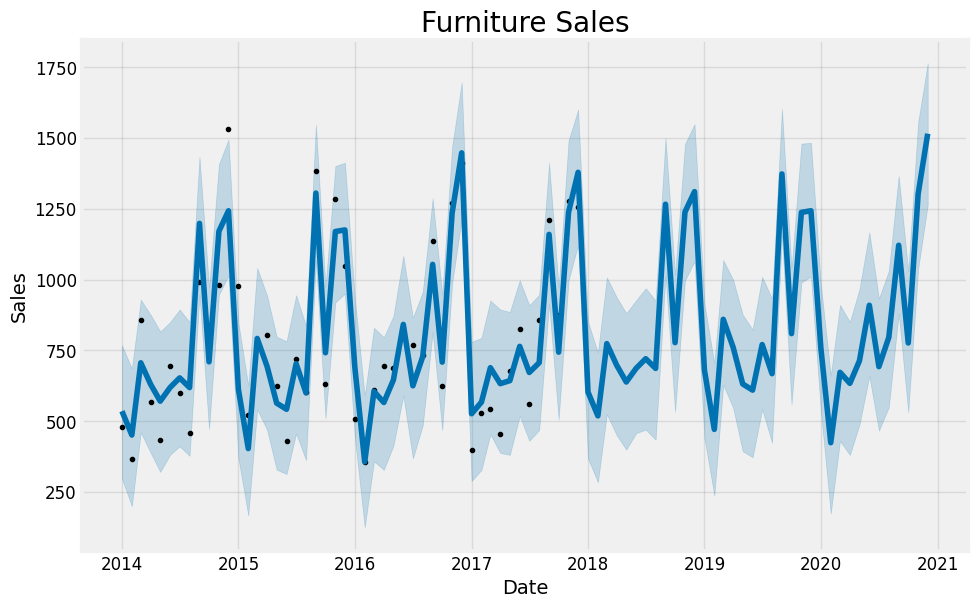

In [66]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

##OFFICE PLOT

<Figure size 1800x600 with 0 Axes>

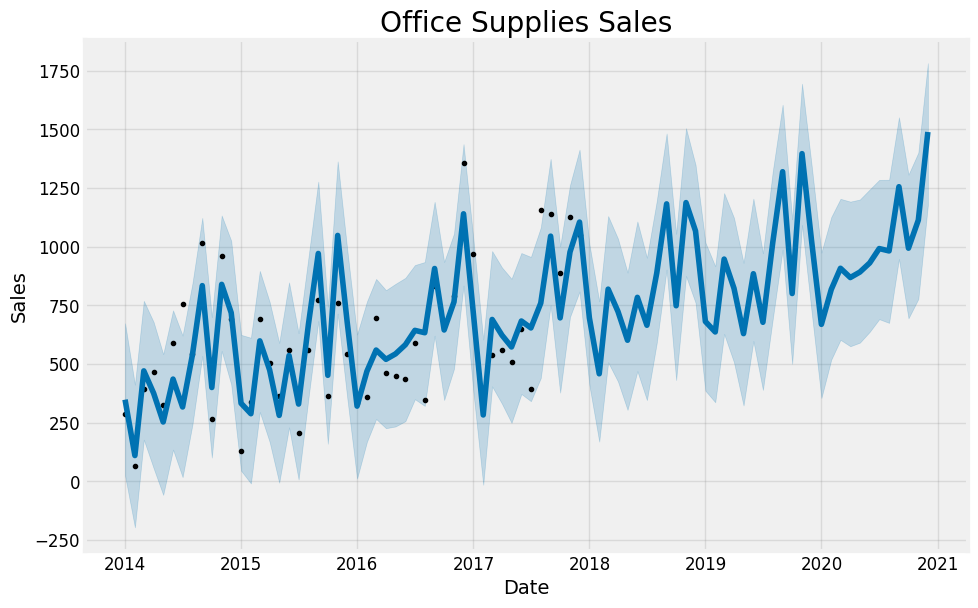

In [67]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

##MERGE FORECAST

In [68]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')

forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,296.600241,767.802147,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,199.653190,686.014537,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,460.532706,929.303076,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,388.114633,875.912512,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,320.785934,816.884708,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


###VISUALIZING  TREND AND FORECAST

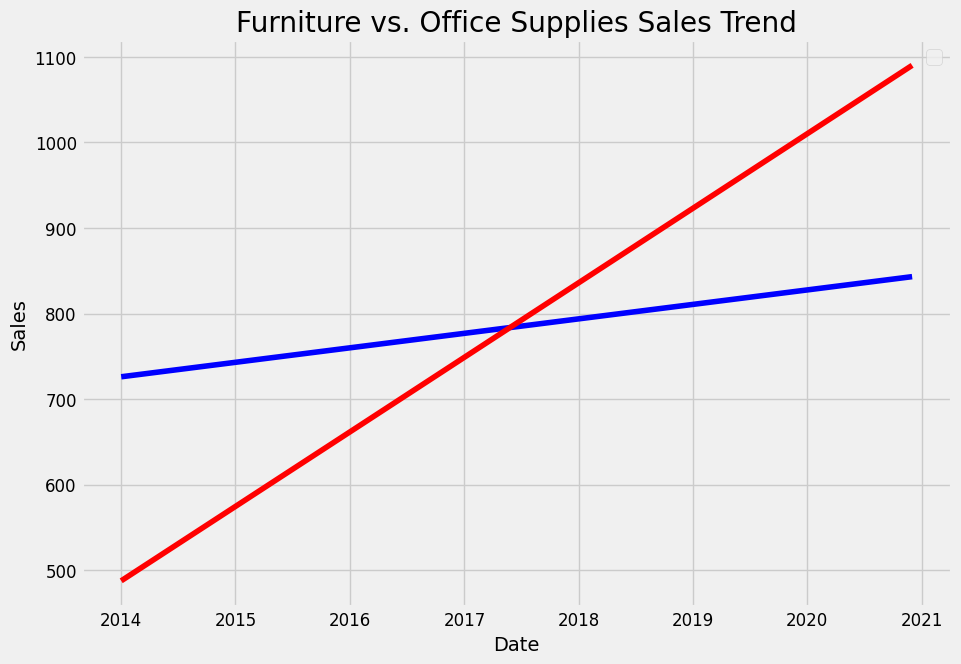

In [69]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend');

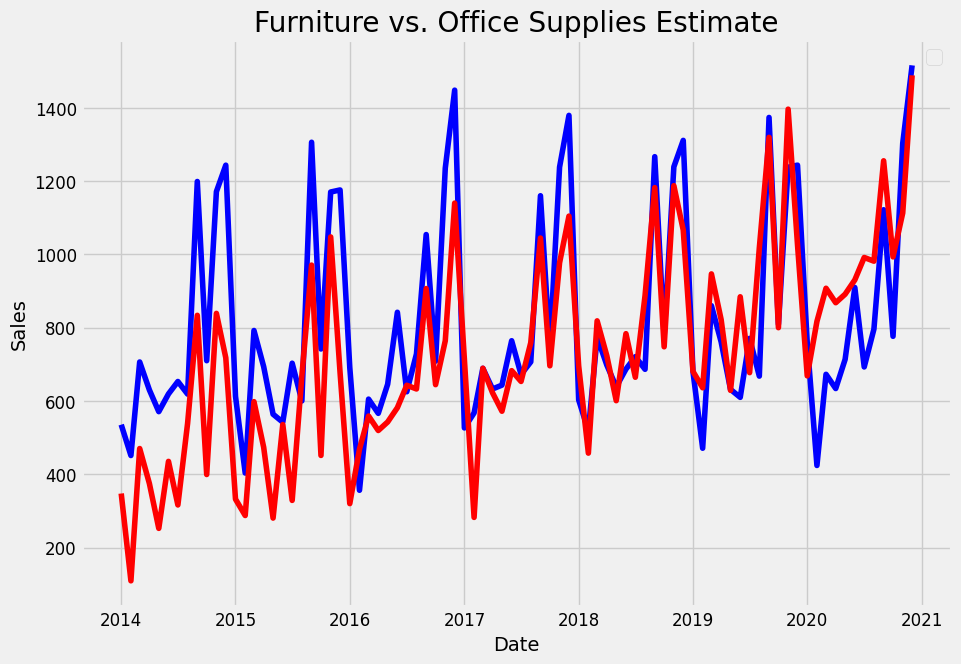

In [70]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

###TREND

FURNITURE

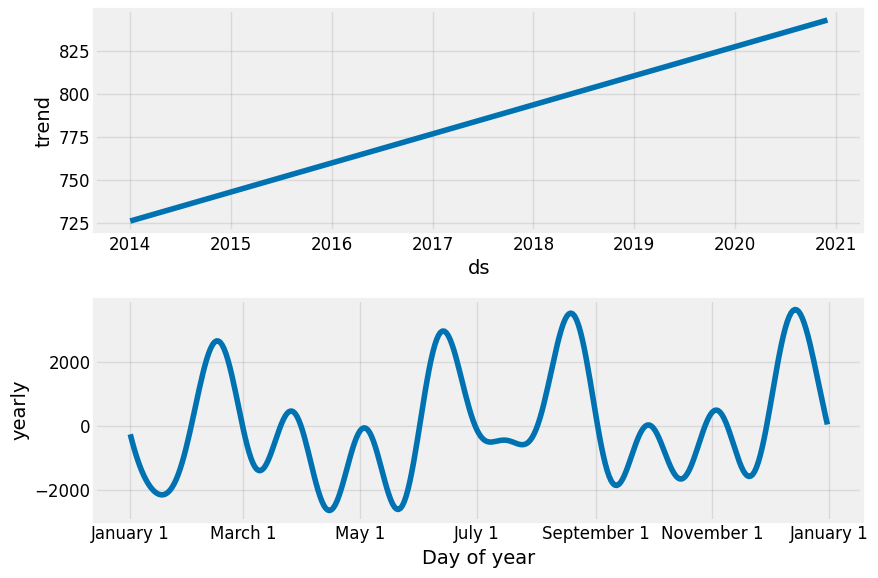

In [71]:
furniture_model.plot_components(furniture_forecast);

OFFICE

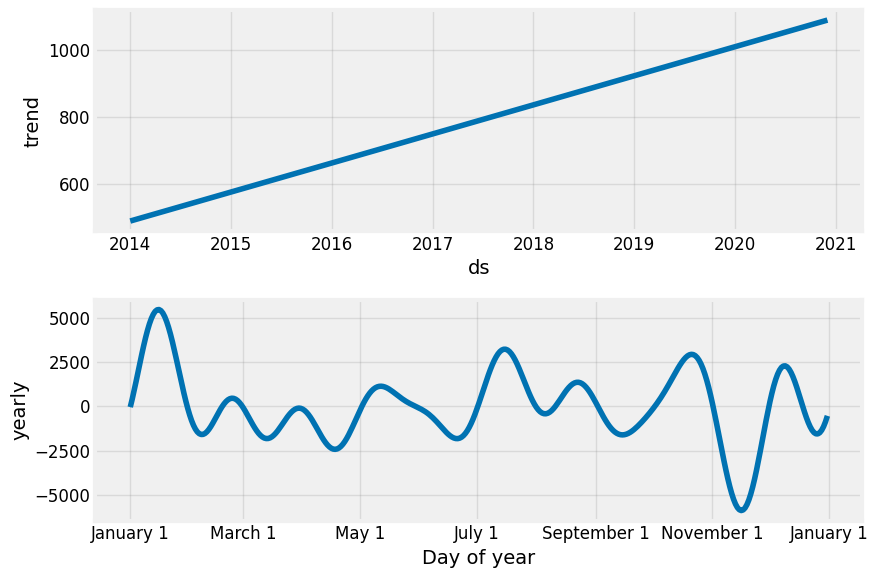

In [72]:
office_model.plot_components(office_forecast);